<a href="https://colab.research.google.com/github/Subah27/Personal-Finance-Analyzer/blob/main/PP_03_02_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Personal Finance Analyzer
1. Log Income
2. Log Expense
3. View Financial Insights
4. Set Monthly Budget
5. Check Budget
6. Set Savings Goal
7. Track Savings Progress
8. Visualize Expenses (Pie Chart)
9. Exit
Choose an option (1-9): 1
Enter source of income (e.g., salary, freelancing, investments): Salary
Enter the income amount: 10000
Enter the date (YYYY-MM-DD): 2024-12-05
Income of 10000.0 from Salary logged successfully on 2024-12-05.

Personal Finance Analyzer
1. Log Income
2. Log Expense
3. View Financial Insights
4. Set Monthly Budget
5. Check Budget
6. Set Savings Goal
7. Track Savings Progress
8. Visualize Expenses (Pie Chart)
9. Exit
Choose an option (1-9): 1
Enter source of income (e.g., salary, freelancing, investments): Freelancing
Enter the income amount: 5000
Enter the date (YYYY-MM-DD): 2024-12-06
Income of 5000.0 from Freelancing logged successfully on 2024-12-06.

Personal Finance Analyzer
1. Log Income
2. Log Expense
3. View Financial Insights
4. Set Monthly Budget
5

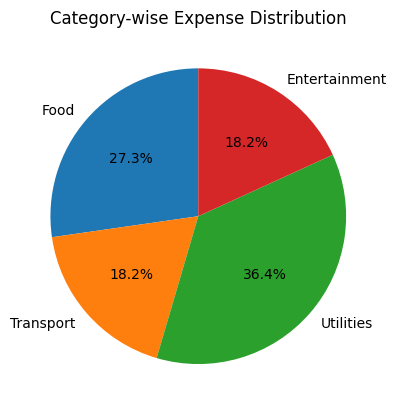


Personal Finance Analyzer
1. Log Income
2. Log Expense
3. View Financial Insights
4. Set Monthly Budget
5. Check Budget
6. Set Savings Goal
7. Track Savings Progress
8. Visualize Expenses (Pie Chart)
9. Exit
Choose an option (1-9): 9
Exiting the program.


In [1]:
import csv
import json
from datetime import datetime
import matplotlib.pyplot as plt

# Define file paths for storing data
INCOME_FILE = 'income_data.csv'
EXPENSE_FILE = 'expense_data.json'
BUDGET_FILE = 'budget_data.json'
GOALS_FILE = 'goals_data.json'

# Initialize the budget and goal data if files do not exist
def initialize_files():
    try:
        with open(BUDGET_FILE, 'r') as file:
            pass
    except FileNotFoundError:
        with open(BUDGET_FILE, 'w') as file:
            json.dump({}, file)

    try:
        with open(GOALS_FILE, 'r') as file:
            pass
    except FileNotFoundError:
        with open(GOALS_FILE, 'w') as file:
            json.dump({}, file)

# Function to log income data
def log_income():
    source = input("Enter source of income (e.g., salary, freelancing, investments): ")
    amount = float(input("Enter the income amount: "))
    date = input("Enter the date (YYYY-MM-DD): ")

    # Store the income data in CSV format
    with open(INCOME_FILE, 'a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([source, amount, date])
    print(f"Income of {amount} from {source} logged successfully on {date}.")

# Function to log expense data
def log_expense():
    categories = ['Food', 'Transport', 'Utilities', 'Entertainment']
    print("Categories:", categories)

    category = input(f"Enter expense category ({', '.join(categories)}): ")
    while category not in categories:
        category = input(f"Invalid category. Please choose from ({', '.join(categories)}): ")

    amount = float(input("Enter the expense amount: "))
    date = input("Enter the date (YYYY-MM-DD): ")

    # Create a dictionary to hold expense data
    expense_data = {
        "category": category,
        "amount": amount,
        "date": date
    }

    # Save expense data to JSON file
    try:
        with open(EXPENSE_FILE, 'r') as file:
            expenses = json.load(file)
    except (FileNotFoundError, json.JSONDecodeError):
        expenses = []  # Initialize an empty list if file does not exist or is empty

    expenses.append(expense_data)

    # Save the updated expense data to the file
    with open(EXPENSE_FILE, 'w') as file:
        json.dump(expenses, file, indent=4)

    print(f"Expense of {amount} in {category} category logged successfully on {date}.")

# Function to calculate financial insights
def financial_insights():
    try:
        # Calculate total income
        total_income = 0
        with open(INCOME_FILE, 'r') as file:
            reader = csv.reader(file)
            for row in reader:
                total_income += float(row[1])

        # Calculate total expenses
        total_expenses = 0
        category_expenses = {'Food': 0, 'Transport': 0, 'Utilities': 0, 'Entertainment': 0}
        with open(EXPENSE_FILE, 'r') as file:
            expenses = json.load(file)
            for expense in expenses:
                total_expenses += expense['amount']
                category_expenses[expense['category']] += expense['amount']

        # Calculate net savings
        net_savings = total_income - total_expenses

        print("\nFinancial Insights:")
        print(f"Total Income: {total_income}")
        print(f"Total Expenses: {total_expenses}")
        print(f"Net Savings: {net_savings}")

        # Display category-wise expense breakdown as percentages
        print("\nCategory-wise Expense Breakdown:")
        total_category_expense = sum(category_expenses.values())
        for category, amount in category_expenses.items():
            percentage = (amount / total_category_expense) * 100 if total_category_expense > 0 else 0
            print(f"{category}: {percentage:.2f}%")

    except FileNotFoundError:
        print("No income or expense records found.")

# Function to set monthly budget limits for categories
def set_budget():
    categories = ['Food', 'Transport', 'Utilities', 'Entertainment']
    budgets = {}

    print("\nSet Monthly Budget Limits:")
    for category in categories:
        budget = float(input(f"Enter the monthly budget for {category}: "))
        budgets[category] = budget

    with open(BUDGET_FILE, 'w') as file:
        json.dump(budgets, file)

    print("Budget limits set successfully.")

# Function to check if user has exceeded their budget
def check_budget():
    try:
        # Load current budget limits
        with open(BUDGET_FILE, 'r') as file:
            budgets = json.load(file)

        # Load expenses and check if they exceed the budget
        with open(EXPENSE_FILE, 'r') as file:
            expenses = json.load(file)

        category_totals = {'Food': 0, 'Transport': 0, 'Utilities': 0, 'Entertainment': 0}
        for expense in expenses:
            category_totals[expense['category']] += expense['amount']

        print("\nBudget Check:")
        for category, budget in budgets.items():
            if category_totals[category] > budget:
                print(f"Warning: Exceeded budget for {category}. Total: {category_totals[category]}, Budget: {budget}")
            else:
                print(f"{category}: Within budget. Total: {category_totals[category]}, Budget: {budget}")

    except FileNotFoundError:
        print("No budget or expense records found.")

# Function to set savings goals and track progress
def set_savings_goal():
    goal_amount = float(input("Enter your savings goal amount: "))
    deadline = input("Enter your savings goal deadline (YYYY-MM-DD): ")
    current_savings = float(input("Enter your current savings: "))

    goal_data = {
        "goal_amount": goal_amount,
        "deadline": deadline,
        "current_savings": current_savings
    }

    with open(GOALS_FILE, 'w') as file:
        json.dump(goal_data, file)

    print(f"Savings goal set. Goal amount: {goal_amount}, Deadline: {deadline}, Current savings: {current_savings}")

# Function to track progress on savings goals
def track_savings_progress():
    try:
        with open(GOALS_FILE, 'r') as file:
            goal_data = json.load(file)

        goal_amount = goal_data["goal_amount"]
        current_savings = goal_data["current_savings"]
        deadline = goal_data["deadline"]

        remaining_amount = goal_amount - current_savings
        print(f"\nSavings Goal Progress:")
        print(f"Goal Amount: {goal_amount}")
        print(f"Current Savings: {current_savings}")
        print(f"Remaining Amount to Save: {remaining_amount}")

        if remaining_amount <= 0:
            print("Congratulations! You've reached your savings goal!")
        else:
            print(f"Keep going! You have {remaining_amount} left to save.")

    except FileNotFoundError:
        print("No savings goal records found.")

# Function to visualize expenses using a pie chart
def visualize_expenses():
    try:
        with open(EXPENSE_FILE, 'r') as file:
            expenses = json.load(file)

        category_totals = {'Food': 0, 'Transport': 0, 'Utilities': 0, 'Entertainment': 0}
        for expense in expenses:
            category_totals[expense['category']] += expense['amount']

        categories = list(category_totals.keys())
        amounts = list(category_totals.values())

        plt.pie(amounts, labels=categories, autopct='%1.1f%%', startangle=90)
        plt.title("Category-wise Expense Distribution")
        plt.show()

    except FileNotFoundError:
        print("No expense records found.")

# Main menu to interact with the user
def main_menu():
    initialize_files()  # Ensure all necessary files exist

    while True:
        print("\nPersonal Finance Analyzer")
        print("1. Log Income")
        print("2. Log Expense")
        print("3. View Financial Insights")
        print("4. Set Monthly Budget")
        print("5. Check Budget")
        print("6. Set Savings Goal")
        print("7. Track Savings Progress")
        print("8. Visualize Expenses (Pie Chart)")
        print("9. Exit")

        choice = input("Choose an option (1-9): ")

        if choice == '1':
            log_income()
        elif choice == '2':
            log_expense()
        elif choice == '3':
            financial_insights()
        elif choice == '4':
            set_budget()
        elif choice == '5':
            check_budget()
        elif choice == '6':
            set_savings_goal()
        elif choice == '7':
            track_savings_progress()
        elif choice == '8':
            visualize_expenses()
        elif choice == '9':
            print("Exiting the program.")
            break
        else:
            print("Invalid choice, please try again.")

# Run the main menu
if __name__ == "__main__":
    main_menu()
